### 1 input sigmoid function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-w*x + b))

In [3]:
w = 0.9
b = 0.1

#spaced x values
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

above, we defined fn for scalar. but called with a vector - python BROADCASTING.   
calls scalar fn for every element in the vector and returning answers as a vector.  
numpy functions, operators like +,-,etc. automatically broadcasts

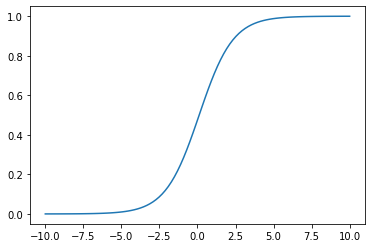

In [4]:
plt.plot(X,Y)
plt.show()
#very flat regions at large x values.

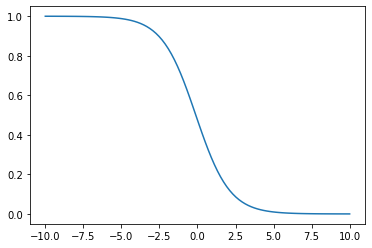

In [5]:
w = -0.9
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()
#flipped (negative 'slope'ish)

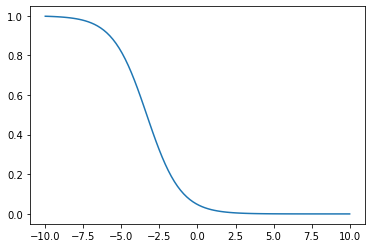

In [6]:
b = 3
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()
#shifts

sliders in colab :  
code snippets - adding form fields - #@param {type:'slider', min: , max: , step:}

sigmoid   
w controls the slope-ish  
b controls the position (shift)

### 2 inputs sigmoid function

In [16]:
# 2 inputs
# sigmoid of weighted combination of inputs

def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1 + w2*x2 + b)))


#### 3d plot

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [17]:
from mpl_toolkits import mplot3d

#### Meshgrid

We have two axes. We draw them and we have a grid. Each crossing point in the grid is an (x,y) coordinate. We want these (x,y) with indexes (i,j).  "Indexing" grid points.  
ie, we need to access two values: 'x' and 'y' at one 2D index (i,j). Therefore two grid matrices, one for x and one for y.  

( x_grid(i,j) , y_grid(i,j) ) -> (x,y)


meshgrid:  

take two vectors(axes) and return a two meshed versions (one for each axis)

XX, YY = np.meshgrid(X,Y)  
( XX\[i,j], YY[i,j] ) is the pair  

a matrix-of-coordinate-tuples 'would be' an option. and (i,j) index gives a tuple (grid coordinate)

In [18]:
X_axis = np.linspace(-10,10,100)
Y_axis = np.linspace(-10,10,100)

X2_grid, Y2_grid = np.meshgrid(X_axis, Y_axis)

# my naming convention "M2" => 2d matrix

2 vector input - broadcasting : ouput using i-th scalar of each vector. return vector of those outputs. 

In [20]:
w1 = 0.5
w2 = 0.5
b = 0

Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)

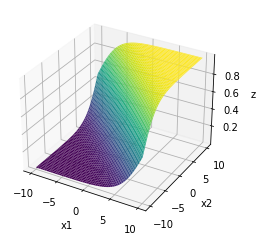

In [21]:
# plot 3D
fig = plt.figure() #figure handler

ax = plt.axes(projection='3d') # 3D axis handler
ax.plot_surface(X2_grid,Y2_grid,Z,cmap = 'viridis') 

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
plt.show()

x1 = () slice will be a 1D sigmoid  
similarly x2 = () slice

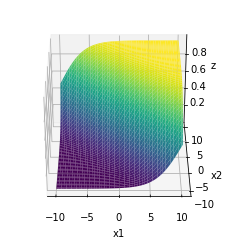

In [24]:
# adjust view property using axis handler
ax.view_init(30,270) #height at which we are looking from, rotation of plot w.r.t z axis.
fig

Just figure handler - will return the figure to 'out' .

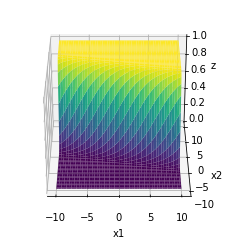

In [26]:
w2 = 2 # one weight - larger

Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)

# plot
fig = plt.figure() #figure handler
ax = plt.axes(projection='3d') # axis handler
ax.plot_surface(X2_grid,Y2_grid,Z,cmap = 'viridis') 
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

ax.view_init(30,270)

plt.show()

### Contour plot

Instead of Z surface, level curve contours.  
color = value  

better clarity visulaization in screen.

In [29]:
w1 = 0.5
w2 = 0.5
b = 0

Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)

#### Custom color map

In [30]:
#using our own color map
import matplotlib.colors 
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
#red - 0 to green - 1

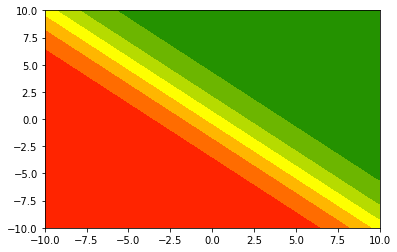

In [31]:
# Contour plot

plt.contourf(X2_grid,Y2_grid,Z,cmap=my_cmap)
plt.show()

like looking from above.. better visualisation.

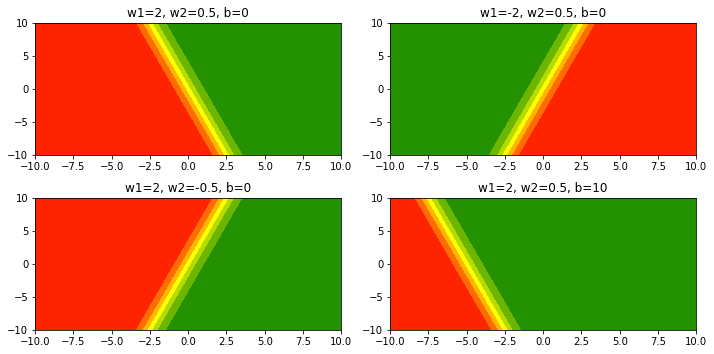

In [50]:
fig, axes = plt.subplots(2, 2, figsize = (10,5)) 
# return a figure handler and an array of axis handlers, one for each

w1 = 2
w2 = 0.5
b = 0
Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)
axes[0,0].contourf(X2_grid,Y2_grid,Z,cmap=my_cmap)
axes[0,0].set_title("w1=2, w2=0.5, b=0")

w1 = -2
w2 = 0.5
b = 0
Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)
axes[0,1].contourf(X2_grid,Y2_grid,Z,cmap=my_cmap)
axes[0,1].set_title("w1=-2, w2=0.5, b=0")

w1 = 2
w2 = -0.5
b = 0
Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)
axes[1,0].contourf(X2_grid,Y2_grid,Z,cmap=my_cmap)
axes[1,0].set_title("w1=2, w2=-0.5, b=0")

w1 = 2
w2 = 0.5
b = 10
Z = sigmoid_2d(X2_grid,Y2_grid,w1,w2,b)
axes[1,1].contourf(X2_grid,Y2_grid,Z,cmap=my_cmap)
axes[1,1].set_title("w1=2, w2=0.5, b=10")

fig.tight_layout(pad=1)# set the spacing between subplots
plt.show()

here we can see the "0.5-line" changing with change in w  
notice that the gap between colors is also shrinking - ie, the sigmoid is steeper.  
thus w affects both the scaling, and the angle of the 0.5-line  

when weight is negative - opposite slope-ish  

when the other weight is negative - color flip  

changing b alone - translate the 0.5-line .. (parallely)


think: as changing w and b - transforming the input space.. and the 'ideal-sigmoid' changing accordingly.